## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [0]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [38]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!cd gdrive/My\ Drive/MyKeras

In [40]:
!ls gdrive/My\ Drive


 00-Virtuali-Tee
 0130.pdf
 0174544A00_ATTCH1.rtf.gdoc
 01聽得見的動作電位.pdf
 02_教案黑客松_教案單.docx
 02_教案黑客松_教案單.docx.gdoc
 0419滴血認親.docx.gdoc
 04.pdf
 0811生物科國小學習內容說明部分修訂版.docx
 0811生物科國小學習內容說明部分修訂版.docx.gdoc
 100.4-6活動函稿計畫--各校.doc
 100上輔導團行事曆.doc
'101-1快樂營上課日程表G7-生物(週一).doc'
'101-2快樂營上課日程表G7-生物(週一).doc.gdoc'
 101學生Email.gdoc
'101年度「資訊科技融入教學創新應用典範團隊」初賽計畫 (1).doc'
 101年度「資訊科技融入教學創新應用典範團隊」初賽計畫.doc
 101課程
 102-2G7生物.xlsx
 102-2G7生物.xlsx.gsheet
'10 24「各科教材教法工作坊」說明.gdoc'
 102B空白進度表.xlsx
 102B行事曆.gsheet
 102年12月-103年5月公用金.gsheet
 102年資優班試題.doc
 103117生物.doc
 103117生物.doc.gdoc
'103127生物(調整版).docx'
 103-2-1ana.pdf
'103-2-1生物題目卷 (1).pdf'
 10322段考.pdf
 103A3-2.pdf
 103A3段考.gdoc
 103A3段考解題影片.gsheet
 103A3答案.gsheet
 103A3雙向細目表.gsheet
 103九年級進度.gsheet
 103十八屆教師會各辦公室收費人員名單-1.doc
 103十八屆教師會各辦公室收費人員名單-1.doc.gdoc
 103命題紙-生物.docx
 103學年度下學期第二次段考解題影片.gsheet
 103學年度第一學期第二次段考.gsheet
'103學年度給家長的信的家長聯絡資料 (回覆內容).gsheet'
 103學年的生物科社群工作.gdoc
 103年度新竹市精進教學計畫-學習社群計畫成果報告.docx
 103年度新竹市精進教學計畫-學習社群計畫成果報告.docx.gdoc
 103第三次段考

In [0]:
train, test = keras.datasets.cifar10.load_data()

In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [0]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 20
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [0]:
"""
# 載入 Callbacks, 並將監控目標設為 validation loss, 且只存最佳參數時的模型
"""
from keras.callbacks import ModelCheckpoint

model_ckpt = ModelCheckpoint(filepath="gdrive/My Drive/MyKeras/tmp.h5", 
                             monitor="val_loss", 
                             save_best_only=False,
                             save_weights_only=True)

In [47]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[model_ckpt]
         )
model.save_weights('gdrive/My Drive/MyKeras/my_model_weights.h5')


# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]



Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_14 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_15 (Batc (None, 128)               512 

In [51]:
# Load back all model
#model = keras.models.load_model("gdrive/My Drive/MyKeras/tmp.h5")

# Load back only weights
model.load_weights('gdrive/My Drive/MyKeras/my_model_weights.h5', by_name = True)


loss_loadback, acc_loadback = model.evaluate(x_test, y_test)



10000/10000 [==============================] - 1s 66us/step


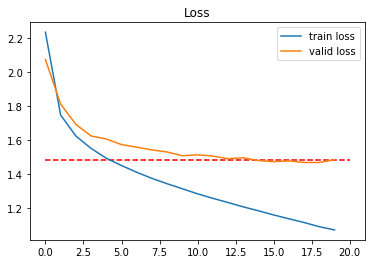

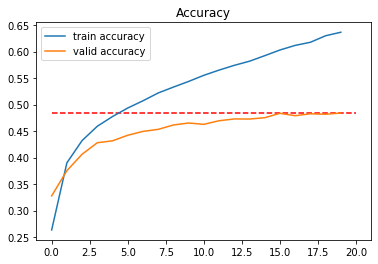

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.hlines(y=loss_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.hlines(y=acc_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title("Accuracy")
plt.show()